### <font color="brown">Pandas - DataFrame Continued</font>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame

#### <font color="brown">Dropping rows or columns (variation of del operation for column)</font>

In [3]:
nparr = np.random.random((4,3))
randdf = DataFrame(nparr,index=['four','one','three','two'],columns=['first','second','third'])
randdf

,first,second,third
four,0.109477,0.169521,0.289260
one,0.474415,0.723282,0.600529
three,0.390936,0.143654,0.202124
two,0.318139,0.965112,0.902342


**Dropping rows**

In [4]:
randdf2 = randdf.drop(['four','three'])
randdf2

,first,second,third
one,0.474415,0.723282,0.600529
two,0.318139,0.965112,0.902342


In [5]:
randdf

,first,second,third
four,0.109477,0.169521,0.289260
one,0.474415,0.723282,0.600529
three,0.390936,0.143654,0.202124
two,0.318139,0.965112,0.902342


**Original is not changed**

In [6]:
rfcopy = randdf.copy()
del rfcopy['second']
rfcopy

,first,third
four,0.109477,0.289260
one,0.474415,0.600529
three,0.390936,0.202124
two,0.318139,0.902342


**Remember that the operator del for deleting column changes original**

**We can use drop for column need to use axis=1**

In [7]:
randdf.drop(['third'],axis=1)

,first,second
four,0.109477,0.169521
one,0.474415,0.723282
three,0.390936,0.143654
two,0.318139,0.965112


In [8]:
randdf

,first,second,third
four,0.109477,0.169521,0.289260
one,0.474415,0.723282,0.600529
three,0.390936,0.143654,0.202124
two,0.318139,0.965112,0.902342


**Use inplace=True to modify original**

In [9]:
rcopy = randdf.copy()
rcopy.drop(['three','four'],inplace=True)
rcopy

,first,second,third
one,0.474415,0.723282,0.600529
two,0.318139,0.965112,0.902342


---

### <font color="brown">Data Curation and Exploration</font>

In [10]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series

#### <font color="brown">Titanic Dataset from Kaggle</font>
https://www.kaggle.com/c/titanic

**On the Kaggle page above, if you look at the Data tab, you will see files named train.csv (training set), and test.csv (test set). The training set has 891 instances, and the test set has 418 instances. The training set was downloaded and renamed as titanic_train.csv**

In [11]:
titanic_file = 'titanic_train.csv'
titanic = pd.read_csv(titanic_file)

In [12]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**An explanation for the columns is given in the Data tab, under Data Dictionary**

In [13]:
# column data information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### **Cabin (only 204/891) and Age (only 714/891) have lots of missing values, and Embarked has 2 missing values**

---

##### <font color="brown">Missing values in numeric columns</font>

In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### **AGE: mean is about 29, median (50% cutoff) is 28. Let's replace missing values with mean or median, since they are about the same.**

In [15]:
titanic[titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [16]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [17]:
# reveiw info, all Age columns should now be filled
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
titanic.loc[[5,17,19,26,28]]  # verify 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q


---

##### <font color="brown">Missing values in non-numeric (categorical) columns</font>

##### **Embarkation ports**

In [19]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [20]:
# let's see what is the distribution of Embarked values
embarked_vc = titanic['Embarked'].value_counts()
embarked_vc

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

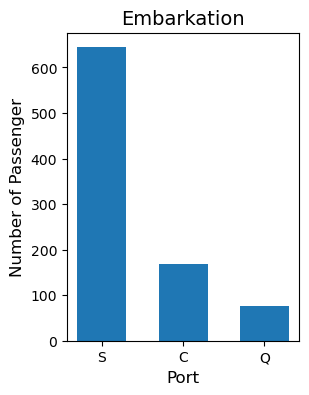

In [21]:
# plot bar chart for counts at embarkation ports
from matplotlib import pyplot as plt
plt.figure(figsize=(3,4))
plt.bar(range(len(embarked_vc)),embarked_vc.values, width=0.6)
plt.xticks(range(len(embarked_vc)),embarked_vc.index)
plt.title('Embarkation',fontsize=14)
plt.xlabel('Port',fontsize=12)
plt.ylabel('Number of Passenger',fontsize=12)
plt.show()

##### **<font color="brown">Can also plot directly off Pandas</font>**

In [22]:
# first make a dataframe just for the embarked counts
edf = pd.DataFrame(embarked_vc)
edf

,count
Embarked,
S,644
C,168
Q,77


In [23]:
# we need the S,C,Q index values to be in a separate column
edf = edf.reset_index()  
edf.columns = ['Port','Passengers']
edf

,Port,Passengers
0,S,644
1,C,168
2,Q,77


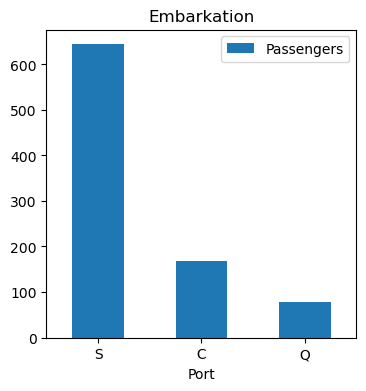

In [24]:
axis = edf.plot(x='Port',y='Passengers',kind='bar',rot=1,title='Embarkation',figsize=(4,4))
# rot is rotation for x-ticks, see what happens when you take it out

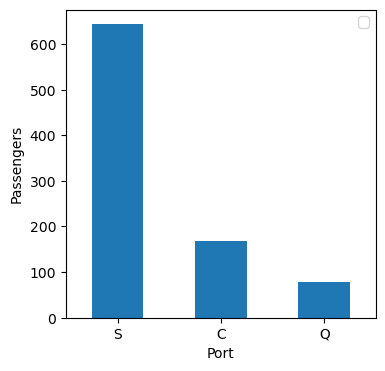

In [25]:
# remove legend, label the y axis
axis = edf.plot(figsize=(4,4),x='Port',y='Passengers',kind='bar',rot=1)
axis.set_ylabel('Passengers')
axis.legend('') 

##### **An often used option for replacement of null categorial values is to use the most frequent value**

In [26]:
# replace the missing Embarked values with 'S'
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [27]:
# verify that count for S has been updated, from 644 to 646
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

---

##### <font color="brown">Plot the age distribution<font>

In [28]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

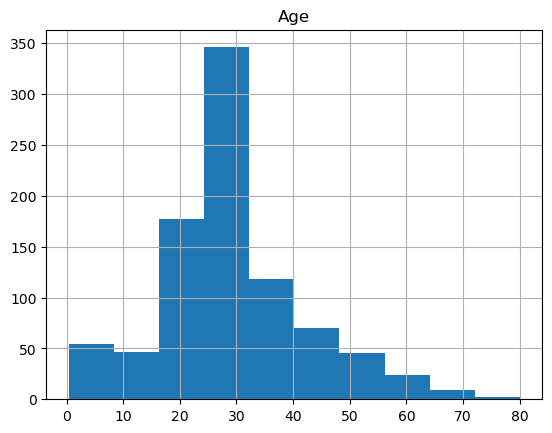

In [29]:
titanic.hist(column='Age')

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

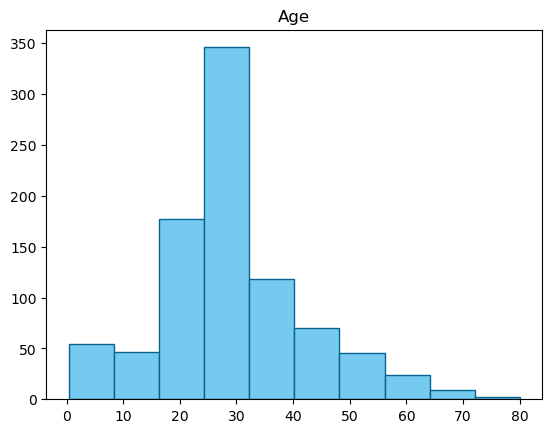

In [30]:
titanic.hist(column='Age',grid=False,color='#76c9ef',edgecolor='#056590')

---

#### <font color="brown">Visualizing the IRIS Dataset from UCI</font>
https://archive.ics.uci.edu/ml/datasets/Iris

**Load data into DataFrame from URL**

In [31]:
IRIS_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal_length','sepal_width','petal_length','petal_width','iris-type']
iris = pd.read_csv(IRIS_URL,names=columns)

In [32]:
iris

,sepal_length,sepal_width,petal_length,petal_width,iris-type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
iris['iris-type'].value_counts()

iris-type
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Plot sepal width vs sepal length for each of the iris types<br>
Extract subset DataFrames for each of the iris types, and plot directly off DataFrame**

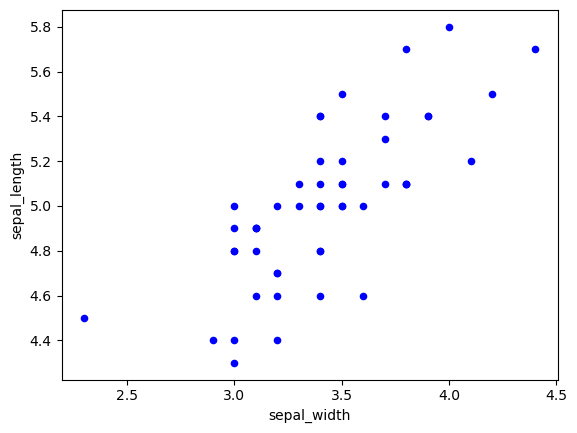

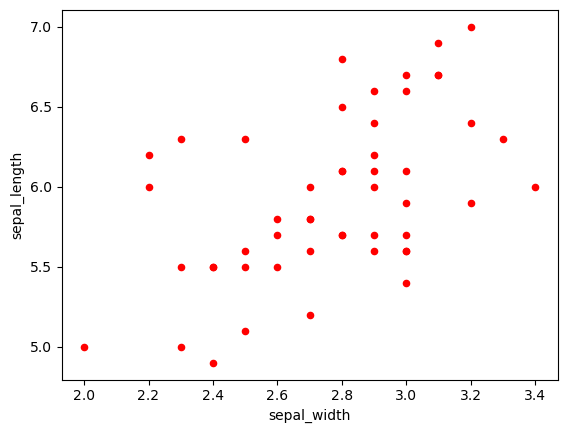

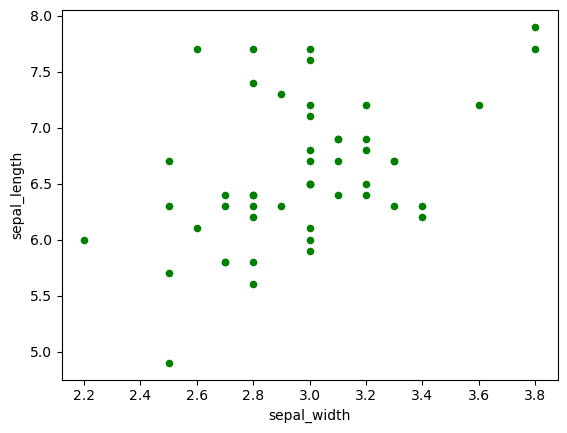

In [35]:
iris_types = iris['iris-type'].unique()
colors = ['blue','red','green']
for iris_type,color in zip(iris_types,colors):
    df = iris[iris['iris-type'] == iris_type]    
    df.plot('sepal_width','sepal_length',kind='scatter',color=color)

**Do all of them in the same plot, for easy comparison**

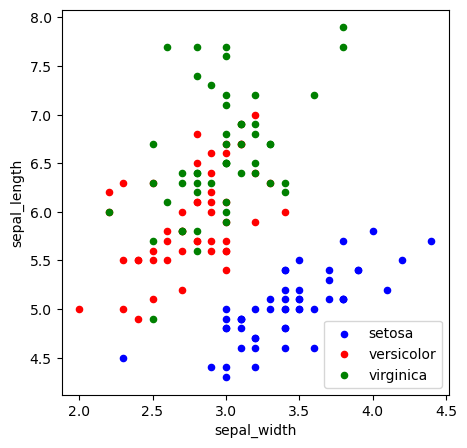

In [36]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
for iris_type,color in zip(iris_types,colors):
    df = iris[iris['iris-type'] == iris_type]    
    df.plot('sepal_width','sepal_length',ax=ax,kind='scatter',color=color,label=iris_type[5:])
# ax.legend(loc='center right')


**Repeat for sepal length vs petal length and petal width<br>
Share the y axis since they are all sepal length**

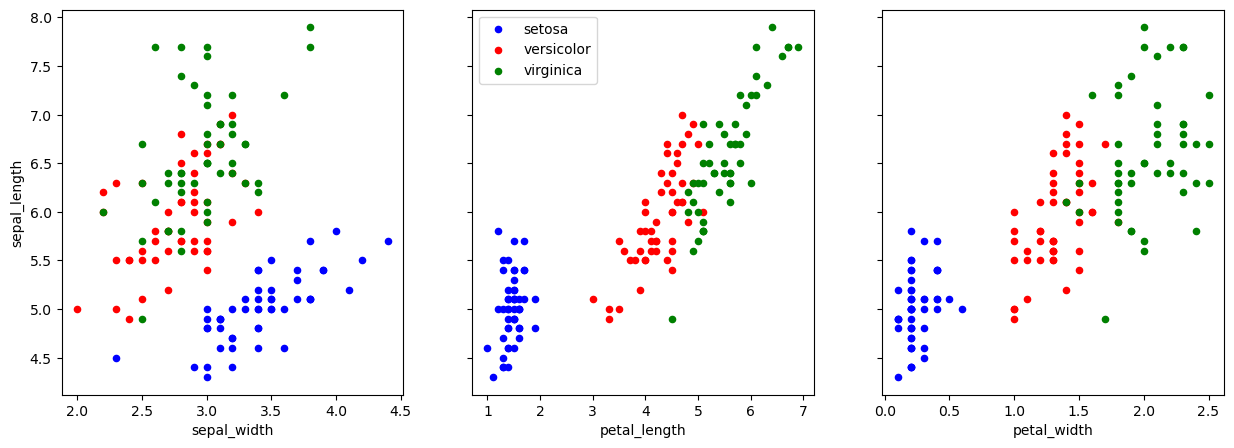

In [37]:
fig, axes = plt.subplots(1,3,sharey=True)
fig.set_size_inches(15,5)
axsubs = [0,1,2]
for x,axsub in zip(['sepal_width','petal_length','petal_width'],axsubs):
    for iris_type,color in zip(iris_types,colors):  
        df = iris[iris['iris-type'] == iris_type]    
        df.plot(x,'sepal_length',ax=axes[axsub],kind='scatter',color=color,label=iris_type[5:])

# remove legends for the first and last plots
axes[0].get_legend().remove()
axes[2].get_legend().remove()

---

#### <font color="brown">Exploring the California Housing Dataset</font>

#### Presented in Aurelien Geron's book "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow"
https://github.com/ageron/handson-ml2/tree/master/datasets/housing

Also see:<br>
https://developers.google.com/machine-learning/crash-course/california-housing-data-description

**Get the housing data<br>**
URL: https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz

In [38]:
import urllib, tarfile

housing_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
urllib.request.urlretrieve(housing_url, 'housing.tgz')
housing_tgz = tarfile.open('housing.tgz')
housing_tgz.extractall()
housing_tgz.close()

**Load the extracted csv file into a DataFrame**

In [39]:
housing = pd.read_csv('housing.csv')

##### **Big Picture**

In [40]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


**See https://developers.google.com/machine-learning/crash-course/california-housing-data-description<br>
for a description of each of these columns. In particular, median income is in tens of thousands of dollars.**

In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**The only column that has null values is total_bedrooms**

---

##### **Ocean Proximity**

In [42]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [43]:
ocp = DataFrame(housing['ocean_proximity'].value_counts())
ocp

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [44]:
ocp = ocp.reset_index()
ocp.columns = ['Ocean Proximity','Blocks']
ocp

,Ocean Proximity,Blocks
0,<1H OCEAN,9136
1,INLAND,6551
2,NEAR OCEAN,2658
3,NEAR BAY,2290
4,ISLAND,5


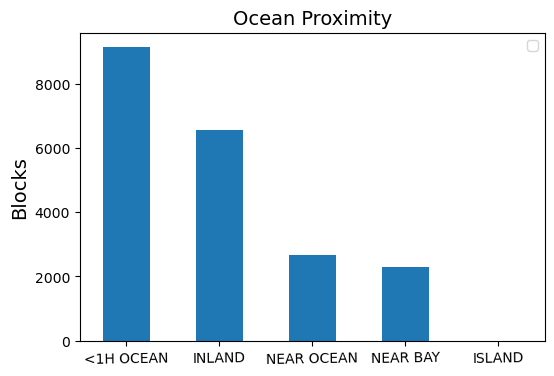

In [45]:
axis = ocp.plot(figsize=(6,4),x='Ocean Proximity',y='Blocks',kind='bar',rot=1)
axis.set_ylabel('Blocks',fontsize=14)
axis.set_xlabel('')
axis.set_title('Ocean Proximity',fontsize=14)
axis.legend('') 

---

##### **Histograms for numerical attributes**

In [46]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

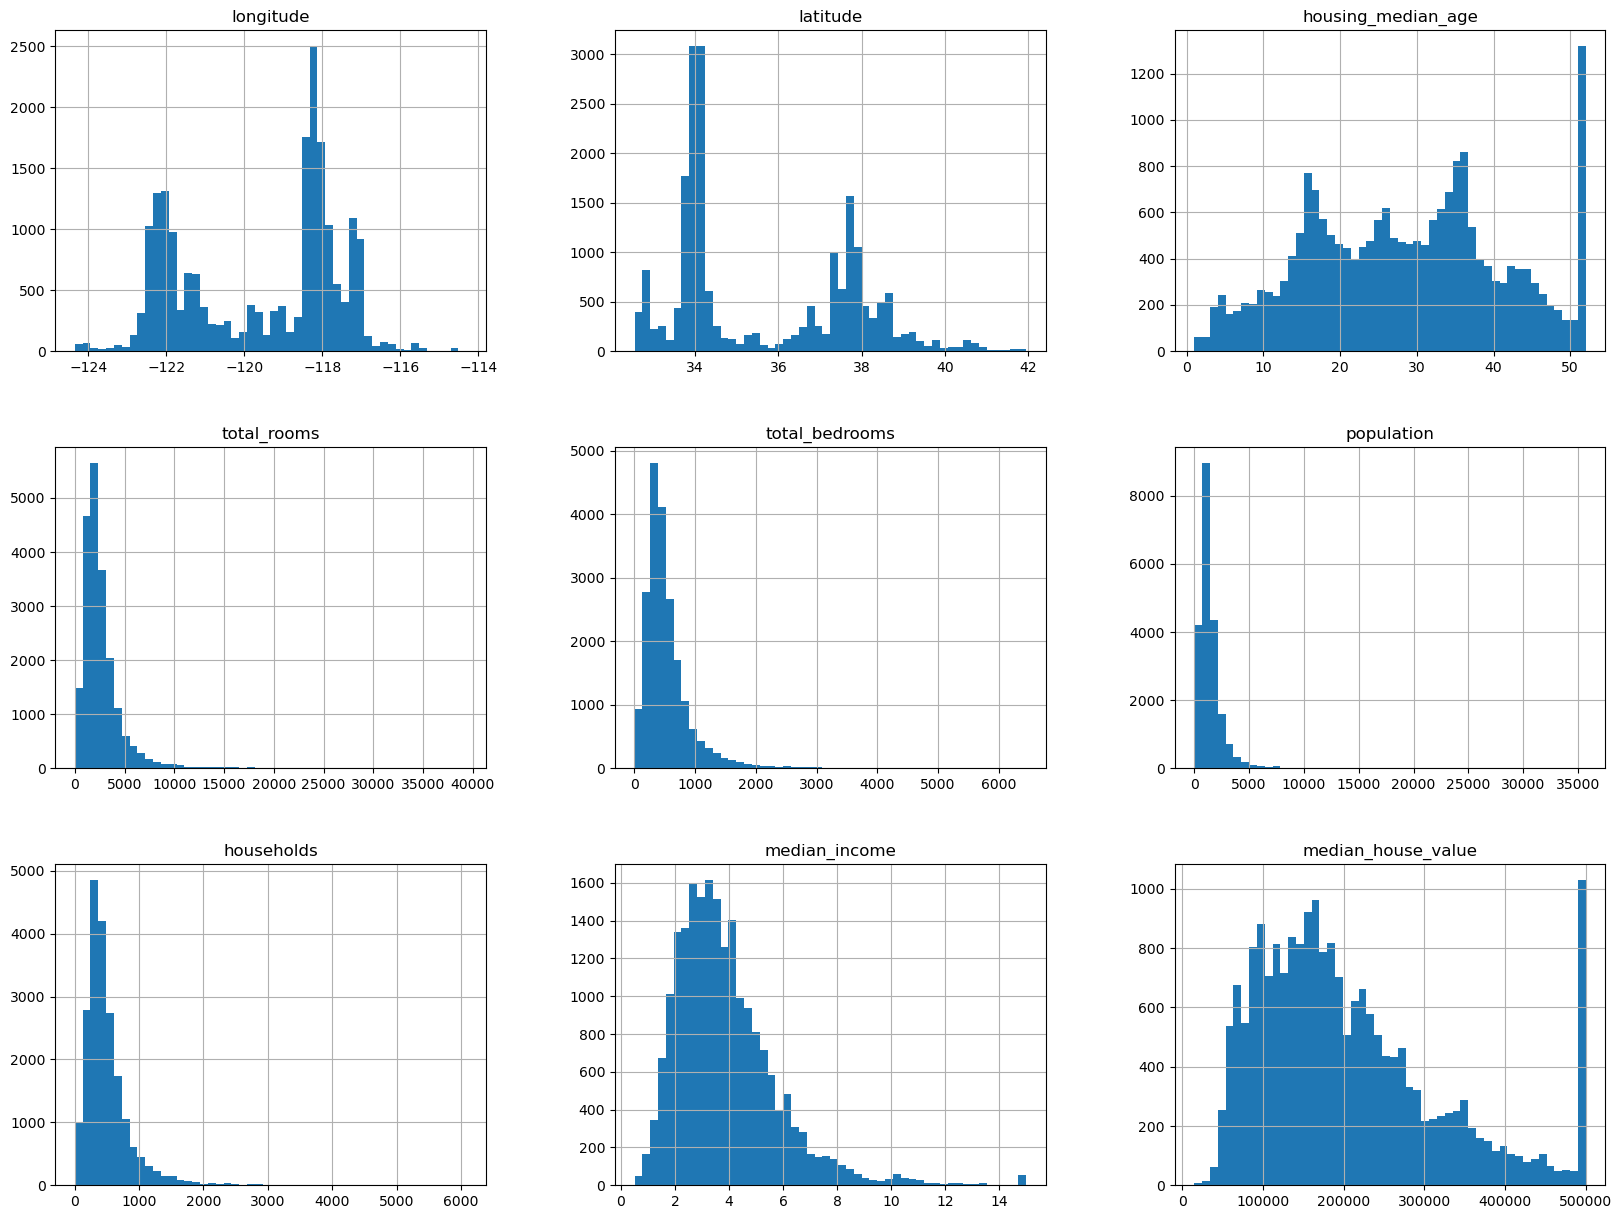

In [47]:
housing.hist(bins=50, figsize=(20,15))

---

##### **Income Categories**
Make a new column for income categories by partitioning median income into 5 classes: 1,2,3,4,5 for incomes in the ranges (0, 1.5), (1.5, 3.0), (3.0, 4.5), (4.5, 6.0), 6.0 and over. Use **Pandas.cut**
method

In [48]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1,2,3,4,5])

In [49]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
ic_vals = housing['income_cat'].value_counts()
print(ic_vals)

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64


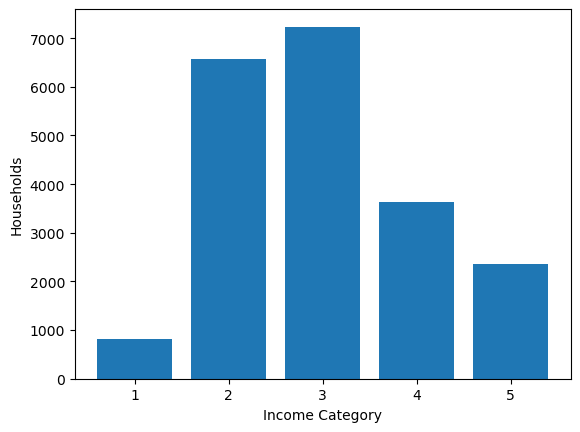

In [52]:
plt.bar(ic_vals.index, ic_vals.values)
plt.xlabel("Income Category")
plt.ylabel("Households")
plt.show()

---

##### **Longitude-Latitude Map like plot**

<Axes: xlabel='longitude', ylabel='latitude'>

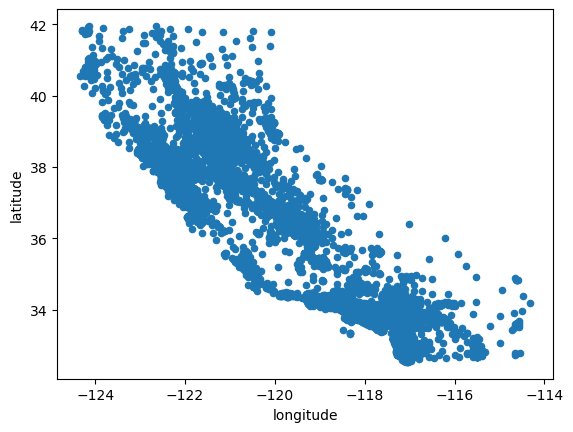

In [53]:
housing.plot(kind='scatter',x='longitude',y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

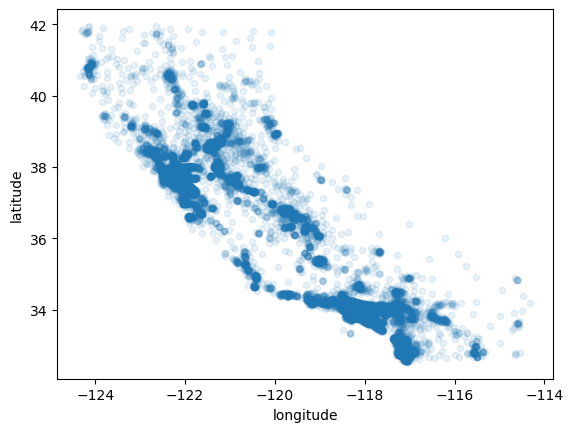

In [54]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

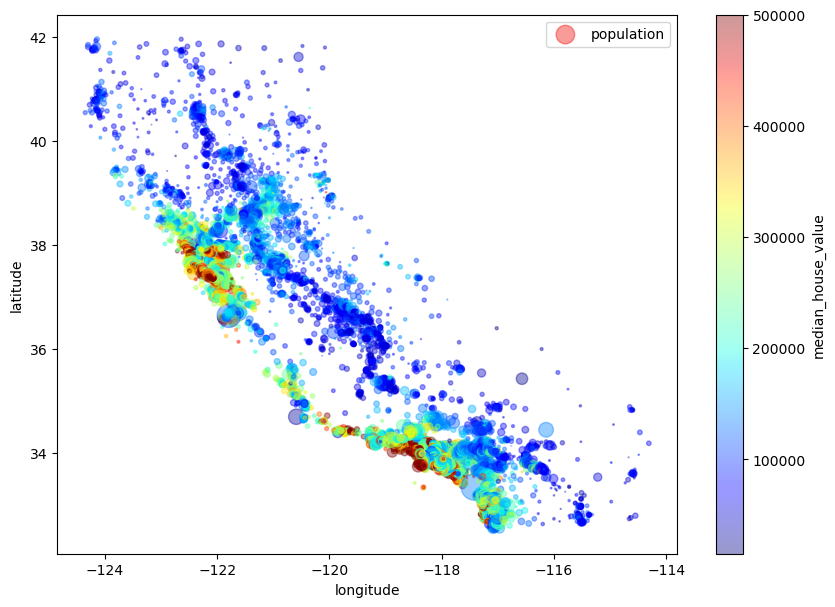

In [55]:
# heat map
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             s=housing['population']/100,label='population',
             figsize=(10,7),c='median_house_value',
             cmap=plt.get_cmap('jet'),colorbar=True)